# 3.3 debugging

Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.

# 1 overview

1. Are we one of those programmers who fills their code with `print` statements when trying to debug their programs?
   - We may use to do that.
   - But once we start writing larger programs(**PI:,**) we'll need a better system.
     - Debugging tools for Python vary across platforms, IDEs and editors.
     - Here, we'll focus on Jupyter and leave us to explore other settings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 debugging

## 2.1 the `debug` magic

1. Let's consider a simple (and rather contrived) example, see Program 1.
   - This code is intended to plot the `log` function over the interval $[1, 2]$.
   - But there's an error here
     - `plt.subplots(2, 1)` should be just `plt.subplots()`.
     - The call `plt.subplots(2, 1)` returns a NumPy array containing two axes objects, suitable for having two subplots on the same figure.
   - The traceback shows that the error occurs at the method call `ax.plot(x, np.log(x))`.
     - The error occurs because we have mistakenly made `ax` a NumPy array, and a NumPy array has no `plot` method.
2. Let's pretend that we don't understand this for the moment.
   - We might suspect there's something wrong with `ax`(**PI:,**) but when we try to investigate this object, we get the following exception, see Program 2.
   - The problem is that `ax` was defined inside `plot_log()`, and the name is lost once that function terminates.
   - Let's try doing it a different way.
     - We run the first cell again, generating the same error, see Program 3,
     - But this time, we type in the following cell block `%debug`, see Program 4.
       - We should be dropped into a new prompt that looks something like `ipdb>`.
       - Now we can investigate the value of our variables at this point in the program, step forward through the code, etc.
         - e.g., we can simply type the name `ax` to see what's happening with this object.
         - It's now very clear that `ax` is an array, which clarifies the source of the problem.
       - To find out what else we can do from inside `ipdb`, use the online help by typing `h` inside `ipdb`.
         - `h c` (**PI1: how this improves?**)
       - (**PI2: add "to exit from the `debug` magic, use `q`" and the relationship to `breakpoint()`.**)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

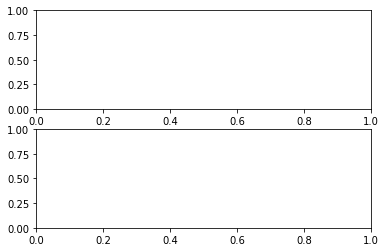

In [4]:
# Program 1
def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()
    
plot_log()

In [5]:
# Program 2

ax

NameError: name 'ax' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

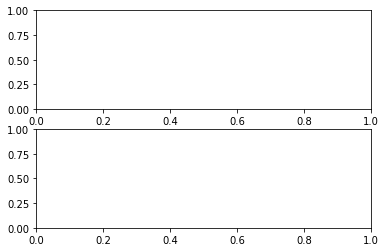

In [6]:
# Program 3

def plot_log():
    fig, ax = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()
    
plot_log()

In [7]:
# Program 4

%debug

> <ipython-input-6-83604a9a20c8>(6)plot_log()
      4     fig, ax = plt.subplots(2, 1)
      5     x = np.linspace(1, 2, 10)
----> 6     ax.plot(x, np.log(x))
      7     plt.show()
      8 

ipdb> ax
array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc370700050>,
      dtype=object)
ipdb> q


## 2.2 setting a break point (**PI3: `breakpoint`**)

1. The preceding approach (section 2.1) is handy but sometimes insufficient.
   - Consider the following modified version of our function above, see Program 5.
     - Here, the original problem is fixed, but we've accidently written `np.logspace(1, 2, 10)` instead of `np.linspace(1, 2, 10)`.
       - Now there won't be any exception, but the plot won't look right.
     - To investigate, it would be helpful if we could inspect variables like `x` during (**PI: the**) execution of the function.
     - To this end, we can add a **"break point (**PI3: `breakpoint`**)"** by inserting `breakpoint()` inside the function code block, see Program 6.
       - We used `n` twice to step forward through the code (one line at a time).
       - Then we printed the value of `x` to see what was happening with that variable.
       - To exit from the debugger, use `q`.

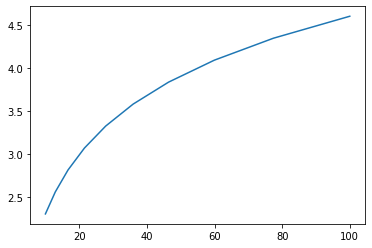

In [2]:
# Program 5

def plot_log():
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()
    
plot_log()

> <ipython-input-8-35f39b86f833>(5)plot_log()
-> fig, ax = plt.subplots()
(Pdb) n
> <ipython-input-8-35f39b86f833>(6)plot_log()
-> x = np.logspace(1, 2, 10)
(Pdb) q


BdbQuit: 

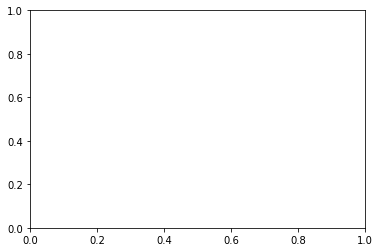

In [8]:
# Program 6

def plot_log():
    breakpoint()
    fig, ax = plt.subplots()
    x = np.logspace(1, 2, 10)
    ax.plot(x, np.log(x))
    plt.show()
    
plot_log()

In [9]:
%debug

> /Users/shuhu/anaconda3/lib/python3.7/bdb.py(113)dispatch_line()
    111         if self.stop_here(frame) or self.break_here(frame):
    112             self.user_line(frame)
--> 113             if self.quitting: raise BdbQuit
    114         return self.trace_dispatch
    115 

ipdb> n


# 3 other useful magics （PI4: any other relating to debugging?）

1. In this lecture, we used the `%debug` IPython magic.
   - There are many other useful magics:
     - `precision 4` sets printed precision for floats to 4 decimal places.
     - `%whos` gives a list of variables and their values.
     - `%quickref` gives a list of magics.
   - The full list of magics is [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html).